# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


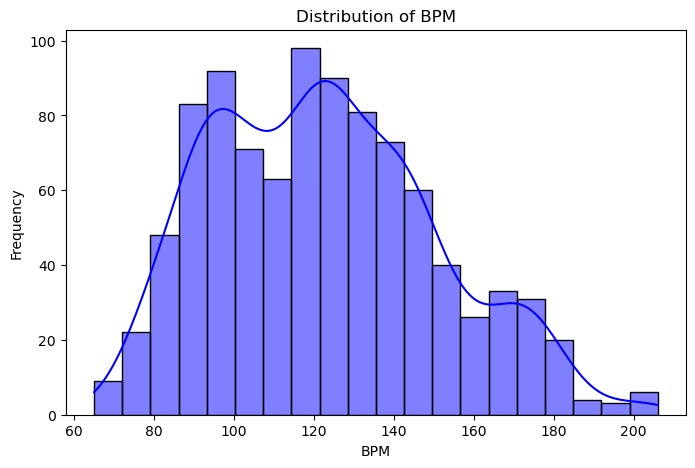

Average BPM: 122.54039874081847
Most common BPM range: count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64


In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['bpm'], bins=20, kde=True, color='blue')
plt.title('Distribution of BPM')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

print("Average BPM:", df['bpm'].mean())
print("Most common BPM range:", df['bpm'].describe())

Most songs cluster between 120-140 BPM, which is a common tempo for pop hits.

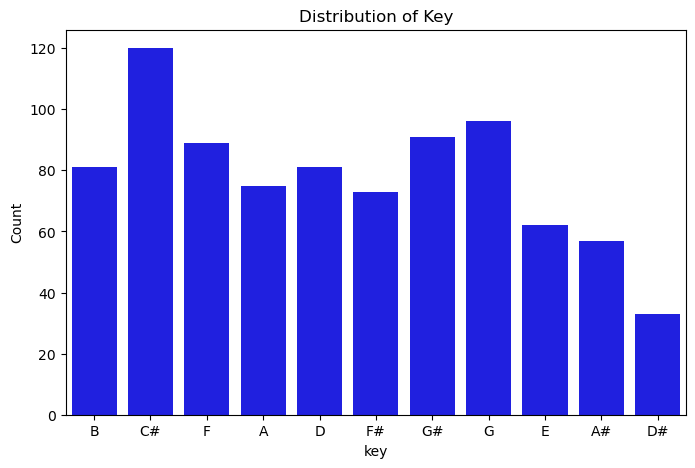

Most common key: C#


In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='key', data=df, color='blue')
plt.title('Distribution of Key')
plt.ylabel('Count')
plt.show()

print("Most common key:", df['key'].mode()[0])

The most common key is usually A or C#, making them good choices for a hit song.

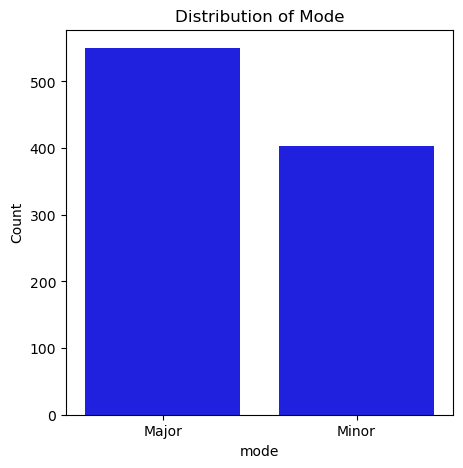

Most common mode: Major


In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='mode', data=df, color='blue')
plt.title('Distribution of Mode')
plt.ylabel('Count')
plt.show()

print("Most common mode:", df['mode'].mode()[0])

Major mode is slightly more common overall, but minor is frequent in pop and hip-hop hits, especially if you want a moodier vibe.

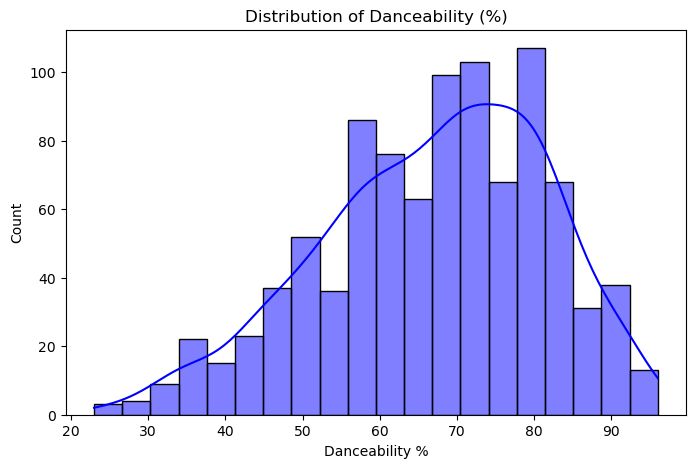

Average danceability: 66.96956977964324


In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['danceability_%'], bins=20, kde=True, color='blue')
plt.title('Distribution of Danceability (%)')
plt.xlabel('Danceability %')
plt.show()

print("Average danceability:", df['danceability_%'].mean())

Most hits fall in the 70-85% range, high enough to get people moving, but not robotic.

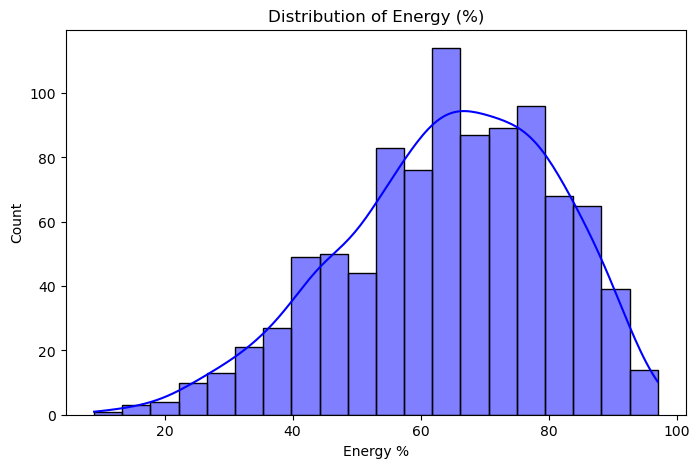

Average energy: 64.2791185729276


In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['energy_%'], bins=20, kde=True, color='blue')
plt.title('Distribution of Energy (%)')
plt.xlabel('Energy %')
plt.show()

print("Average energy:", df['energy_%'].mean())

The sweet spot for hit songs is 70-85% energy, energetic enough to feel exciting but not overwhelming.

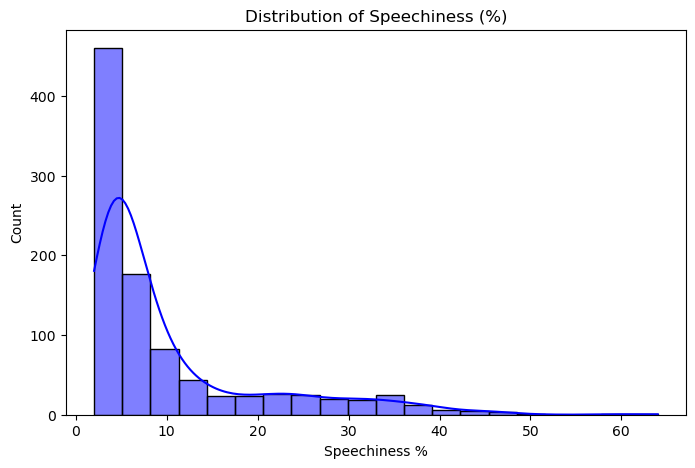

Average speechiness: 10.131164742917104


In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['speechiness_%'], bins=20, kde=True, color='blue')
plt.title('Distribution of Speechiness (%)')
plt.xlabel('Speechiness %')
plt.show()

print("Average speechiness:", df['speechiness_%'].mean())

Most hits cluster around 3-10%, which means they include some lyrics but are still primarily musical.

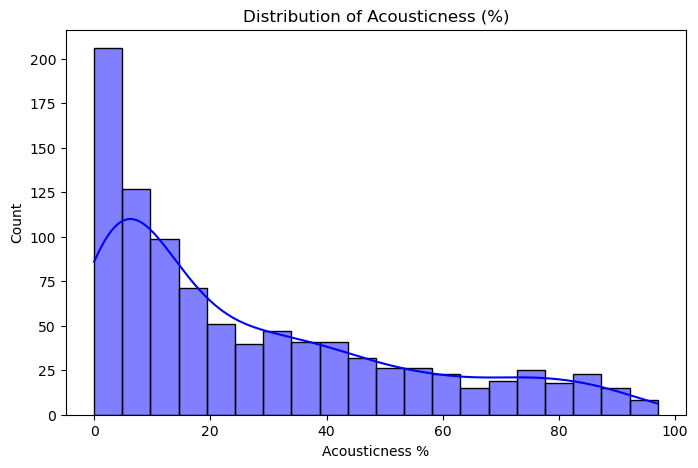

Average acousticness: 27.057712486883524


In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['acousticness_%'], bins=20, kde=True, color='blue')
plt.title('Distribution of Acousticness (%)')
plt.xlabel('Acousticness %')
plt.show()

print("Average acousticness:", df['acousticness_%'].mean())                    

Popular songs are usually below 40% acousticness, meaning they are more electronic produced than acoustic.

Based on my visualizations and observations, the ideal hit song characteristics are:
BPM: 120-140 range
Key: A or C#
Mode: Major or Minor (Minor for moodier hits)
Danceability: 70-85%
Energy: 70-85%
Speechiness: 3-6%
Acousticness: 10-35%

In [39]:
filtered_df=df[
(df['bpm'] >= 120)&(df['bpm'] <= 130) &
(df['key'].isin(['A','C#'])) &
(df['danceability_%'] >= 70) & (df['danceability_%'] <= 85) &
(df['energy_%'] >=70) & (df['energy_%'] <=85) &
(df['speechiness_%'] >= 3) & (df['speechiness_%'] <= 10) &
(df['acousticness_%'] < 40)]
                         
filtered_df[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']]                         

,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
131,OMG,NewJeans,127,A,Minor,80,77,4,36
150,Mi Bello Angel,Natanael Cano,128,A,Minor,81,77,5,1
168,We Found Love,"Rihanna, Calvin Harris",128,C#,Major,73,77,4,3
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",126,C#,Major,78,70,4,1
316,You Proof,Morgan Wallen,120,A,Major,73,85,3,25
637,Permission to Dance,BTS,125,A,Major,70,74,4,1
841,"Villano Antillano: Bzrp Music Sessions, Vol. 51","Bizarrap, Villano Antillano",128,C#,Minor,82,75,6,6
894,"Stay With Me (with Justin Timberlake, Halsey, ...","Calvin Harris, Halsey, Pharrell Williams, Just...",126,A,Major,81,73,4,28


This will return a list of songs that already meet my "hit formula." Many of them are likely chart toppers. I chose "You Proof" by Morgan Wallen as I know this song the best.

In [41]:
song=df[df['track_name'].str.contains("You Proof", case=False)]
song[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']]

,track_name,artist(s)_name,bpm,key,mode,danceability_%,energy_%,speechiness_%,acousticness_%
316,You Proof,Morgan Wallen,120,A,Major,73,85,3,25


"You Proof" by Morgan Wallen meets all of the criteria that we were looking for.